Test the sparseGP outputs and using='truth' form for qp Ensemble objects.  sparseGP aka GPz just outputs ID, zest, zqual, and zerr.  PDF is Gaussian centered at zest with width zerr.  Ibrahim generated this data back in January, Zahra is working on new GPz stuff, but I think the format will be the same.

In [2]:
import numpy as np
import qp
import scipy.stats as sps
import matplotlib.pyplot as plt
import individual_metrics as inmet
%matplotlib inline

In [3]:
infile = "sparseGP.csv" #format is one commented line at top, 4 cols: buzzID zEst zQuality zErr *NOT CSV!*
truthfile = "Finbuzz_idsz.out" #format is one commented line, 2 cols: buzzID specz
data = np.genfromtxt(infile,skip_header=1,usecols=(1,3))
mus = data[:,0]
sigmas=data[:,1]
print len(mus),len(sigmas)

1000883 1000883


In [4]:
szs = np.genfromtxt(truthfile,skip_header=1,usecols=(1))

In [5]:
print szs.shape
numgals = len(szs)

(1000883,)


In [6]:
allnormobjs = sps.norm(loc=mus,scale=sigmas)

In [7]:
test1 = sps.norm(loc=mus[0],scale=sigmas[1])
test2 = sps.norm(loc=mus[1],scale=sigmas[1])

In [8]:
print test1.pdf(1.1)

0.0


In [9]:
tmplist = []
tmpszlist = []

In [10]:
for i,xxx in enumerate(mus):
    if i%100==0:
        tmpgaus = sps.norm(loc=mus[i],scale=sigmas[i])
        tmplist.append(tmpgaus)
        tmpszlist.append(szs[i])

In [11]:
numgals = len(tmplist)
print numgals

10009


In [12]:
allpdfs = qp.Ensemble(numgals,truth=tmplist)

In [13]:
newarray = np.arange(0.005,2.12,0.01)
teststack = allpdfs.stack(loc=newarray,using='truth',vb=True)

In [14]:
stackyx = teststack['truth'][0]
stackyy = teststack['truth'][1]

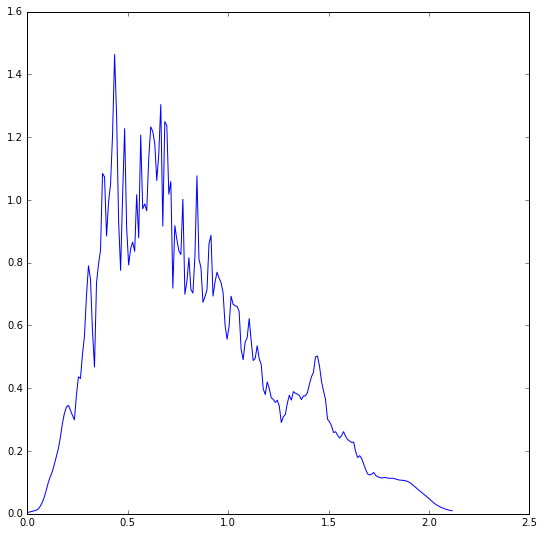

In [15]:
fit = plt.figure(figsize=(9,9))
plt.plot(stackyx,stackyy)

In [16]:
szpdf = qp.PDF(samples=tmpszlist)

Interpolating the `samples` parametrization
Creating a `linear` interpolator for the samples parametrization.
Plotted samples


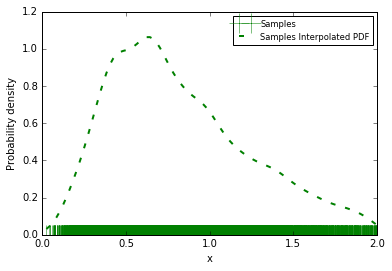

In [17]:
szpdf.plot()

In [18]:
testme = inmet.EvaluateMetric(allpdfs,tmpszlist)

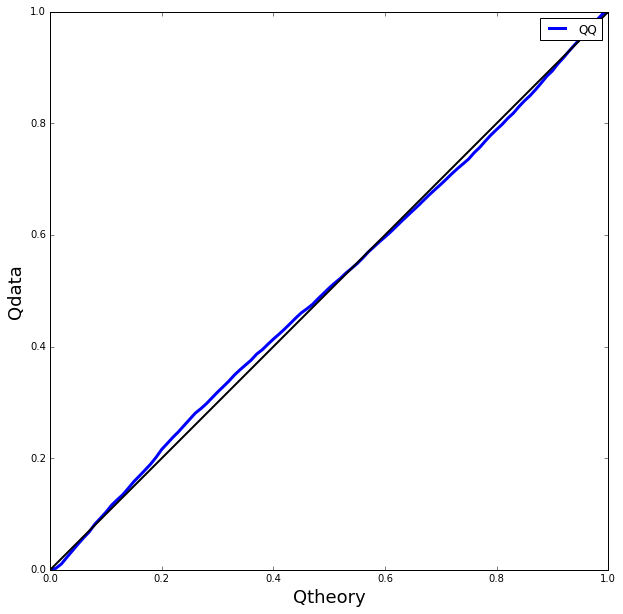

In [19]:
qqplot = testme.QQplot(using='truth',dx=0.0001,Nquants=101)

In [20]:
testKS_stat, testKS_pval = testme.KS(using='truth')
print testKS_stat,testKS_pval

0.0215462589647 0.000181336985293


In [21]:
testAD_stat,testAD_pval = testme.AD(using='truth')

In [22]:
print testAD_stat,testAD_pval

16.3775541846 6.14817091682e-08


In [23]:
testcvm_stat,testcvm_pval=testme.CvM(using='truth')
print testcvm_stat,testcvm_pval

1.08246505785 0.0015782390048
